# Introduction to Time Complexity

This course teaches you how to evaluate the efficiency of algorithms in terms of speed and memory usage. Essentially, an algorithm refers to a program or function designed to solve a specific problem. For instance, a sorting algorithm organizes a list of values in ascending or descending order.

When faced with a problem, there exist multiple approaches to crafting an algorithm to solve it. Throughout this course, you'll gain the ability to assess these algorithms and determine the most efficient one for a given task.

To kick things off, let's construct an algorithm that identifies the maximum value within a list of numbers. Before delving into algorithm analysis, it's essential to have algorithms ready for assessment.

**Instructions**

An empty function, **maximum()**, is provided for you. Your goal is to implement it so that it returns the maximum value in the **values** list that is given as argument. Start by assigning the list [4, 3, 5, 6, 2, 1] to a variable **test_values** before the empty function.

- Erase the **pass** statement and follow these steps to implement the **maximum()** function.
- Initialize a variable named **answer** to **None**. This variable will be used to keep track of the maximum.
- Do a **for** loop over **values** using variable **value**. For each **value** do:
  - If **answer** is **None** or the **answer** is smaller than **value**, assign **value** to **answer**.
- After the **for** loop, return the value of **answer**.
- Execute your function on **test_values**. Assign the result to a variable named **max_value**.

In [3]:
# put your code below

test_values =  [4, 3, 5, 6, 2, 1]

def maximum(values):
#you could just assign it to the first element
#(if it had any) and you would skip those
#None checks that happen for every value
  answer = None
  for value in values:
    if answer == None or answer < value:
      answer = value
  return answer

max_value = maximum(test_values)
max_value

6

# Measuring the Execution Time

In this section, we will delve into the process of gauging the execution time of a Python function. Our primary objective isn't merely to time a single execution of an algorithm; rather, it's to scrutinize the algorithm itself and forecast how its execution time will scale with larger datasets.

Intuitively, as an algorithm grapples with more data, its runtime tends to increase. Our aim is to construct a model that elucidates the relationship between data size and execution time. These models are referred to as the time complexity of an algorithm. Through analyzing an algorithm's time complexity, we endeavor to address questions like:

>  When we double the dataset, does the execution time also double, quadruple, or follow a different pattern altogether?


Our starting point will be measuring execution times because it will help us build valuable intuition. Let's start by learning how to measure the execution time of a Python function.

Python offers a few different ways to do this. In this lesson, we will use the [time module](https://docs.python.org/3/library/time.html). Calling the [time.time()](https://docs.python.org/3/library/time.html#time.time) function, we get the total number of seconds that have passed from January 1, 1970, until now (depending on your OS, this date might change, but that does not matter for what follows).

Try running the following code:

In [4]:
import time
print(time.time())

1711840801.0385983


As we said, the number that we get is the total number of seconds that have passed between January 1, 1970, and now.

Using the **time.time()** function, we can measure the time a Python function takes to execute by computing the difference between the time just after the function finishes executing and the time just before it started executing. If we call the time just before the execution **start** and the time just after **end**, then the execution time of the function will be $end - start$, as shown in blue on the following diagram:


<center>
<img src="https://drive.google.com/uc?id=1C-4knPlFvEiRzGpidQRRTRBqIsZVYwaw" width="90%">
</center>


Concretely, we can measure the execution time of a function **f()** in Python as follows:

```python
import time                
start = time.time()        
f()
end = time.time()          
runtime = end - start
```

Let's try it out and measure the runtime of the **maximum()** function that we wrote on the previous section!


**Instructions**

The **maximum()** function from the previous screen is provided to you. Follow these steps to measure its execution time on the provided **test_values** list, which now contains 500 values.

- Import the **time** module.
- Use the **time.time()** function to compute the number of seconds just before you execute **maximum()**. Assign the result to a variable named **start**.
- Call the **maximum()** function on **test_values**. Assign the result to a variable named **max_value**.
- Use the **time.time()** function to compute the number of seconds just after **maximum()** finished executing. Assign the result to a variable named **end**.
- Compute the difference between these two values. Assign it to a variable named **runtime**.

In [6]:
def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

# add your code below
# generate the variable test_values using 500 random values

#just importing time as it was imported on other cell
#and i aint checking importing time.time over it will
#give me any problems
import time
from random import shuffle
nVals = 500
#we know for sure that the max_value will be 499
test_values = [x for x in range(nVals)]
shuffle(test_values)
start = time.time()
max_value = maximum(test_values)
end = time.time()
#just wanted to use _
run_time = end-start
print(f"max_value: ({max_value}); run_time: ({run_time})")

max_value: (499); run_time: (0.00021314620971679688)


# Generating Random Inputs

On the previous section, we measured the execution time of the **maximum()** function on a list with 500 elements. Just a single measurement doesn't help us understand how the **maximum()** function behaves in terms of execution time.

Let's make the input length vary from length 1 to 500 and collect the execution time for each of them. The goal is to have an insight into how the execution evolves as the length of the list grows.

To do our experiment, we will need to have input lists with sizes 1 to 500 to execute the **maximum()** function. One way to generate these inputs is to use the [random module](https://docs.python.org/3.8/library/random.html). This module provides, among other things, the [random.randint()](https://docs.python.org/3.8/library/random.html#random.randint) function that, given two integers ``a`` and ``b``, outputs a random number between ``a`` and ``b`` (inclusive).

For example:



In [7]:
import random
print(random.randint(1, 10))
print(random.randint(1, 10))
print(random.randint(1, 10))
print(random.randint(1, 10))

4
9
8
8


Using list comprehensions, we can use the **random.randint()** function to generate a random list of length 500 with values, say, from -1,000 to 1,000, as follows:



In [10]:
values = [random.randint(-1000, 1000) for _ in range(500)]
#changed for visibility
values[:10]

[299, 732, -163, 486, -739, 812, -719, 466, 23, -903]

Notice that we used the ``_`` notation in the above **for** loop. This is a notation that can be used when we do not use the iteration variable. It gives the exact same result that we would get using some variable name, but avoids having to find a name for something that we will not use.

Since we want to be able to generate inputs of lengths 1 to 500, it is convenient to define a function that takes as input a length and outputs a random list of the given length:

In [11]:
def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

We can now evaluate the execution time of the **maximum()** function on inputs ranging from length 1 to 500 by following these steps:

- Using a **for** loop, make a variable **length** go over all values from 1 to 500
- For each value of **length**, use the **gen_input()** function to get a random list of that length.
- Use the **time** module to time the execution of the function on the generated input.
- Collect all the values in a list

Let's measure the execution time of the **maximum()** function on random input lists from length 1 to 500.

**Instructions**

Some code has been provided for you. Follow these steps to measure the execution time of **maximum()** on random input lists of length 1 to 500:

- Create an empty list named **times**. This list will be used to collect all execution times.
- Do a **for** loop over **range(1, 501)** with a variable named **length**. For each **length** value inside the loop:
  - Generate a random list by calling **gen_input(length)**. Assign the result to a variable named **values**.
  - Using the **time.time()** function, measure the time before calling the **maximum()** function. Assign the result to a variable named **start**.
  - Execute the function **maximum()** on the generated **values** list. You don't need to keep the result of the function.
  - Using the **time.time()** function, measure the time after calling the **maximum()** function. Assign the result to a variable named **end**.
  - Compute the execution time by computing the difference between **end** and **start**.
  - Append the execution time to the **times** list.
- Print the value of **times** to observe that it increases as the length of the list increases.

In [12]:
import time
import random

def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

# add your code below

times = []

for lenght in range(1, 501):
  values = gen_input(lenght)
  start = time.time()
  maximum(values)
  end = time.time()
  times.append(end-start)

print(times)

[2.384185791015625e-06, 1.430511474609375e-06, 9.5367431640625e-07, 1.1920928955078125e-06, 1.1920928955078125e-06, 1.1920928955078125e-06, 1.430511474609375e-06, 1.430511474609375e-06, 1.430511474609375e-06, 1.9073486328125e-06, 1.6689300537109375e-06, 1.9073486328125e-06, 1.9073486328125e-06, 1.6689300537109375e-06, 2.1457672119140625e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 4.0531158447265625e-06, 3.814697265625e-06, 4.291534423828125e-06, 4.5299530029296875e-06, 3.337860107421875e-06, 5.0067901611328125e-06, 4.5299530029296875e-06, 5.0067901611328125e-06, 5.245208740234375e-06, 3.814697265625e-06, 5.4836273193359375e-06, 4.291534423828125e-06, 4.0531158447265625e-06, 5.0067901611328125e-06, 5.245208740234375e-06, 5.4836273193359375e-06, 6.198883056640625e-06, 4.5299530029296875e-06, 5.4836273193359375e-06, 6.67572021484375e-06, 6.4373

# Analyzing Execution Times

On the previous section, we evaluated the execution time of the **maximum()** function on input lists ranging from length 1 to length 500. The printed results are hard to read, so let's plot these times for visualizing how they are growing:


<center>
<img src="https://drive.google.com/uc?id=1BCONOijwuavTPCMmUBtVq4nTz8FV_itz" width="30%">
</center>

We can see some spikes on the execution times at some points. These are due to external factors such as CPU load, memory management, among others. However, despite the lack of accuracy of these measures, we can see a line forming underneath, which roughly describes how the execution time is increasing. This is shown in red in the following plot:

<center>
<img src="https://drive.google.com/uc?id=1faO6ERay9jO0EzfNK_-eM5x6pNIXRvKb" width="30%">
</center>


We can see that as the data increases, so does the execution time. This is not surprising since there is more data to process. However, this tells us more. It gives us an insight on the rate at which it is increasing. The red line is a straight line, which means that the time is growing somewhat proportionally with the data.

This is good news because it means that the execution time grows at the same rate as the data. Doubling the amount of data will double the amount of time needed to process it.

The purpose of this lesson is to learn how to look at an algorithm and derive a mathematical expression for the red line. As mentioned before, we call such an expression the **time complexity of the algorithm**:

<center>
<img src="https://drive.google.com/uc?id=1dN9rz7VL_lTmwtQT7bQX6fjl6KibPTTR" width="30%">
</center>

With the time complexity model, we are able to plug in a list length and get an idea of the execution time of the algorithm for that input length without needing to actually run the code. In general, the time complexity can have several behaviors; it does not always grow as a straight line. We will learn several types of growth throughout this course. By the end of this course, you'll be able to analyze an algorithm and provide a time complexity model:


<center>
<img src="https://drive.google.com/uc?id=1zvgWSpfiPXh98wNCPrHhNPQvttQ9auGk" width="30%">
</center>


# Modeling Execution Times

On this section, we'll learn how we can analyze the time complexity of the following function that computes the sum of all values in a given list:

```python
def sum_values(values):
    total = 0            
    for value in values:
        total += value   
    return total
```

Recall that we don't want to know the exact execution time, just how fast it is growing. Let's assume that each line of code takes some constant time to execute. We start by writing those (unknown) constants in front of each line:

```python
def sum_values(values):
    total = 0            # c1
    for value in values: # c2
        total += value   # c3
    return total         # c4
```

The above comments mean that the first line takes some constant time $c_1$ to be executed. The second takes $c_2$ and so on. Then we can count how many times each line will be executed. This will depend on the length of the **values** list. Let's denote this length by N and write the execution count of each line in front of it:

```python
def sum_values(values):
    total = 0            # c1, 1 time
    for value in values: # c2, N times
        total += value   # c3, N times
    return total         # c4, 1 time
```

Now we multiply the execution time of each line by the number of times it is executed, and add those together:

$
c_1 + c_2 \times N + c_3 \times N + c_4 = (c_2 + c_3) \times N + (c_1 + c_4)
$

We can simplify a bit further by renaming $c_2 + c_3$ as another constant — let's say $α$ — and $c_1 + c_4$ as $β$. By doing so, we obtain a cleaner expression for the execution time in terms of the size of the input $N$:

$
α \times N + β
$

The following figure shows the plot of $α \times N + β$ for the different $α$, $β$ value pairs:

<center>
<img src="https://drive.google.com/uc?id=1ote94fH7ubOFBgddc4Ceo95WE5yGwlHK" width="30%">
</center>

As you can see, regardless of the values of a and b, the function $α \times N + β$ is a straight line. We call an algorithm whose time complexity is a straight line a **linear time algorithm**. These algorithms have the property that the execution times grows proportionally to the data:

<center>
<img src="https://drive.google.com/uc?id=1YyWlCX7LEVYSjNRGS_xvwk2iPTeW6wKO" width="30%">
</center>

Let's measure the execution of **sum_values()** on inputs of length 1 to 500 to confirm our analysis. We expect our experiment to also result in a straight line, in the same way as it did for the **maximum()** function.

**Instructions**


Some code has been provided for you. This includes the **sum_values()** function as well as a **plot_times()** function that can be used to plot the execution times. Don't worry if you don't know how to plot values. For now, you can use this function, which will do the job for you. It takes a list of numeric values as input and makes a plot with them.

Follow these steps to measure the execution time of **sum_values()** on random inputs from size 1 to 500.

- Create an empty list named **times**. This list will be used to collect all execution times.
- Do a **for** loop over **range(1, 501)** with a variable named **length**. Next, do the following inside that loop for each **length** value:
  - Generate a random input by calling the **gen_input()** function on the current value of **length**. Assign the result to a variable named **values**.
  - Using the **time.time()** function, measure the time before calling the **sum_values()** function. Assign the result to a variable named **start**.
  - Execute the function **sum_values()** on the generated **values** list. We don't care about the result, you don't need to store it into a variable.
  - Using the **time.time()** function, measure the time after calling the **sum_values()** function. Assign the result to a variable named **end**.
  - Compute the execution time as the difference between **end** and **start**. Append the result to the **times** list.
- To see the plot and check whether it matches our theoretical prediction that the execution time is growing linearly, run the code **plot_times(times)**.

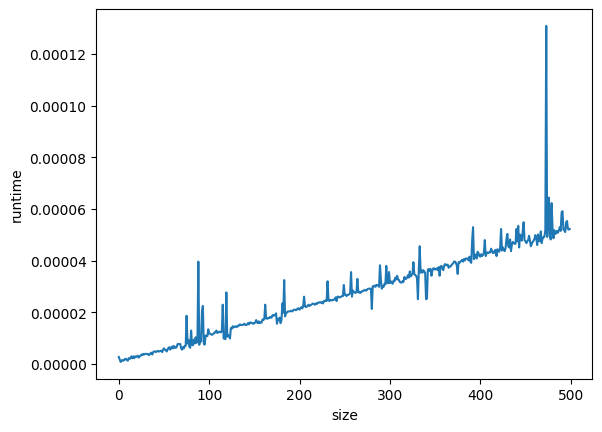

In [13]:
import time
import random
import matplotlib.pyplot as plt

def plot_times(times):
    plt.plot(times)
    plt.ylabel('runtime')
    plt.xlabel('size')
    plt.show()

def sum_values(values):
    total = 0
    for value in values:
        total += value
    return total

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

# add your code below

times = []
for lenght in range(1,501):
  values = gen_input(lenght)
  start = time.time()
  sum_values(values)
  end = time.time()
  times.append(end-start)

plot_times(times)

# Worst-Case Analysis

Great success! Our experiments match our theoretical model! When you plotted the execution times on the previous screen, if everything went well, you got something similar to what we did with the **maximum()** function:

<center>
<img src="https://drive.google.com/uc?id=1H2Gjki2Aexk1Jo2wAT8rkncqji1H0p2j" width="30%">
</center>


We added the red line to highlight the tendency for the execution to grow linearly (as a straight line).

In our analysis on the previous screen, we needed to count how many times each line of code was executed. However, we cannot always do that. Consider for instance the **maximum()** function from before:

```python
def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer
```

How many times is the line **answer = value** executed? Well, that depends on the **values** list. The first time, it is always executed because **answer** is initially set to **None**. After that, it depends on the order of the elements in **values**.

For example, if **values = [1, 2, 3, 4, 5]** then, at every subsequent iteration, **answer < value** will be true, so the line will be executed one time for each value. On the other hand, if **values = [5, 4, 3, 2, 1]** then, the first time **answer** will be set to **5**, and then the line will never be executed again.

We say that the first is a **worst-case** execution analysis and the latter a **best-case** execution analysis. When building a model for the execution time of an algorithm, we often focus on the worst case. There a few reasons for doing so:

- We usually want to process data from a lot of different sources and, consequently, it turns out that the worst-case actually occurs quite often.
- It provides an upper bound. By focusing on the worst-case when building the execution time model, we can guarantee that the executions times will always behave at most as badly as the models predicts. Imagine that you are selling an algorithm that 1% of the time takes one second, and 99% takes over one year. If you advertise it as taking one second (best case), your customers will not be very pleased.

In practice, this means that when building the model, the number of executions that we set for each line of code is the maximum number of times that it can possibly be executed.

With this in mind, let's build a model for the **maximum()** function and see whether it matches our experimental prediction.

```python
def maximum(values):
    answer = None                            # c1, 1 time,  c1
    for value in values:                     # c2, N times, c2*N
        if answer == None or answer < value: # c3, N times, c3*N
            answer = value                   # c4, N times, c4*N
    return answer                            # c5, 1 time,  c5
```

Adding the values together and grouping the terms we get:

$
c_1 + c_2 \times N + c_3 \times N + c_4 \times N + c_5 = (c_2 + c_3 + c_4) \times N + (c_1 + c_5)
$

Cleaning up the constants by renaming $c_2 + c_3 + c_4$ as $α$ and $c_1 + c_5$ as $β$, we again obtain a linear model $αN + β$, as expected. This confirms our previous experimental results on the **maximum()** function.

Now it is your turn to analyze a function while assuming worst-case number of executions for each line.

**Instructions**

A function **count_zeros()** has been provided for you together with three execution time models. Constant execution times have been assigned to each line.

- Count how many times each line is executed as a function of the length of **values**, N.
- Multiply those by the constants and add them together.
Group the terms together, those with N and those without it.
- Assign to a variable named **correct** the model that correctly expresses the worst-case execution time of the **count_zeros()** function.

For example, if you think that **model1** is correct, then assign model1 to variable **correct**.

In [ ]:
def count_zeros(values):
    count = 0            # c1 (only once) -> +c1
    for value in values: # c2 (N*) -> +N*c2
        if value == 0:   # c3 (N*) -> +N*c3
            count += 1   # c4 (N* 'cuz of the worst case consideration) -> +N*c4
    return count         # c5 (only once) -> +c5

model1 = '(c1 + c2) * N + (c3 + c4 + c5)'
model2 = '(c2 + c3) * N + (c1 + c4 + c5)'
model3 = '(c2 + c3 + c4) * N + (c1 + c5)'

correct = model3

# Quadratic Complexity

So far, all the concrete functions that we analyzed had an execution time model that was linear, that is, of the form $αN + β$. Let's see an example where this is not the case. Consider the following **zero_sum()** function that counts the number of pairs of indexes whose values add up to 0.

In [14]:
def zero_sum(values):
    N = len(values)
    count = 0
    for i in range(N):
        for j in range(N):
            if values[i] + values[j] == 0:
                count += 1
    return count

For example, if values = [1, 3, 2, -3] there are two pairs (1, 3) and (3, 1) because

```python
values[1] + values[3] = 3 - 3 = 0
values[3] + values[1] = -3 + 3 = 0
```

We will proceed in the same way as we've been doing so far to build the execution time model.

**Step 1: Assign an unknown constant to each line of code.**

```python
def zero_sum(values):
    N = len(values)                        # c1                     
    count = 0                              # c2
    for i in range(N):                     # c3
        for j in range(N):                 # c4
            if values[i] + values[j] == 0: # c5
                count += 1                 # c6
    return count                           # c7
```

**Step 2: Count how many times each line is executed.**

Let N denote the number of elements in the **values** list. Remember that we now consider the worst case. In this case, we'll assume that the **if** condition is always true.

```python
def zero_sum(values):
    N = len(values)                        # c1, 1 time                     
    count = 0                              # c2, 1 time
    for i in range(N):                     # c3, N times
        for j in range(N):                 # c4, N * N times
            if values[i] + values[j] == 0: # c5, N * N times
                count += 1                 # c6, N * N times
    return count                           # c7, 1 time
```

Before we take the next step, let's make sure we understand why the **for** loop on `j` and inner lines are executed $N^2$ times. By itself, the for loop on `j` is executed N times since it loops over N values. However, it is wrapped inside the **for** loop on `i`, which is also executed N times. Therefore, the total number of executions of the line containing the **for** loop on `j` is $N × N = N^2$.

A general rule of thumb is that a for loop inside another will be executed $N^2$ times, a **for** loop inside two others will be executed $Nˆ3$ times, and so on.

**Step 3: Multiply the constant execution time of each line by the number of times the line is executed.**

```python
def zero_sum(values):
    N = len(values)                        # c1, 1 time,      c1                     
    count = 0                              # c2, 1 time,      c2
    for i in range(N):                     # c3, N times,     c3 * N
        for j in range(N):                 # c4, N * N times, c4 * N^2
            if values[i] + values[j] == 0: # c5, N * N times, c5 * N^2
                count += 1                 # c6, N * N times, c6 * N^2
    return count                           # c7, 1 time,      c7
```

**Step 4: Add all values together and group terms together.**

$
c_1 + c_2 + c_3 \times N + c_4 \times N^2 + c_5 \times N^2 + c_6 \times N^2 + c_7 = (c_4 + c_5 + c_6) \times N^2 + c_3 \times N + (c_1 + c_2 + c_7)
$

Let's simplify this by denoting $c_4 + c_5 + c_6$ as $α$, $c_3$ as $β$ and $c_1 + c_2 + c_7$ as $c$. Doing so, we obtain the following execution time model:

$
α \times N^2 + β \times N + c
$

We call such a model a quadratic model because N is to the power of 2. Algorithms with quadratic complexity quadruple the execution time when the data is doubled:

<center>
<img src="https://drive.google.com/uc?id=1pYdxlJMDq6FVcg-8_9CDjae83r4UW4yY" width="30%">
</center>

As the code becomes more complex, the analysis can become quite messy. In the next section, we'll simplify things further so that it becomes simpler to derive an execution time model.

Before that, let's practice identifying the execution time model of a more complex algorithm.

**Instructions**

A function **sum_pairs()** has been provided for you together with three execution time models. This function calculates the sum of all pairs of values in a given list.

Constant execution times have been assigned to each line.

- Count how many times each line is executed as a function of the length of **values**, N.
- Multiply those by the constants and add them together.
- Group the terms together, those with N and those without it.
- Assign to a variable named **correct** the model that correctly expresses the worst-case execution time of the **sum_pairs()** function.

For example, if you think that **model1** is correct, then assign **model1** to variable **correct**.

In [15]:
def sum_pairs(values):
    pair_sums = 0              # c1 (only once) -> +c1
    for x in values:           # c2 (N*) -> +N*c2
        for y in values:       # c3 (N²*) -> +N² *c3
            pair_sums += x + y # c4 (N²*) -> +N² *c4
    return pair_sums           # c5 (only once) -> +c5

model1 = '(c3 + c4) * N^2 + c2 * N + (c1 + c5)'
model2 = 'c4 * N^2 + (c2 + c3) * N + (c1 + c5)'
model3 = '(c2 + c3 + c4) * N^2 + (c1 + c5)'

correct = model1

# Simplifying Further

So far, we have analyzed algorithms with only a few lines of code, so the calculations did not get extremely complex. However, as algorithms become more complicated, this process can become quite complex and cumbersome.

Moreover, remember that we are only interested in seeing how much the execution time grows as data grows, not the exact execution time. With this in mind, we can simplify our analysis even further by dropping unnecessary information.

## Drop the line constants

In the previous sections, we started by assigning to each line of code a different constant expressing the time that line needs to execute. However, we only care about whether our final expression looks like $α \times N + β$ (linear time complexity) or $α \times N^2 + β \times N + c$ (quadratic time complexity).

The exact values of $α, β$ and $c$ do not matter. What matters is whether we have a $N^2$ term or not.

For this reason, we can safely ignore these constant times from now on. This is the same as treating each of these constants as having value 1.

In other words, we will just count how many times each line is executed:

```python
def maximum(values):
    answer = None                            # 1 time
    for value in values:                     # N times
        if answer == None or answer < value: # N times
            answer = value                   # N times
    return answer                            # 1 time
```

Adding these together we get the total number of line executions:

$
1 + N + N = N + 1 = 3N + 2
$

## Keep only the most significant term

The next simplification step is to keep only the most significant term. By significant here, we mean the one that is growing the fastest. In the above expression we have two terms 3N and 2. The fastest-growing term is 3N since 2 is a constant. Another way to see this is that, as N becomes very big, adding 2 or not becomes less and less relevant because the value of 3N is so large when compared to 2.

We end up with:

$
3N + 2 → 3N
$

In order to avoid going deep into mathematics, we will provide a practical justification of why this can be done in general. Let's imagine that we have an algorithm with:

$
time(N) = N^3 + 5N^2 + 17N
$

We called the expression time(N) to refer to it later. Let's do an experiment where we loop N from 1 to 100, and plot the values of each of the terms $N^3$, $5N^2$ and $17N$, as well as their sum, time(N). The goal is to convince you that the sum time(N) grows almost exactly as its most significant term, $N^3$.

<center>
<img src="https://drive.google.com/uc?id=1a5r-vyzmSmvCIw4wuKoZQPBB8q00nAcs" width="40%">
</center>

As you can see, the total time time(N) (purple curve) and the highest term N^3 (blue curve) are very similar. Therefore, when analyzing the execution time of an algorithm, we can drop all but the most significant term (the one with the highest exponent). So, in this case, we should simplify like so:

$
N^3 + 5N^2 + 17N → N^3
$

##  Drop the constant coefficient

The final step is to drop the remaining constant coefficient, in the case of the **maximum()** function, the 3 from 3N. By doing this, we end up with a simple model for the execution time of the **maximum()** function:

$
3N → N
$

Let's understand why we can do this. Remember that we only care about the rate of growth of the execution time. Let's think about the general linear case time(N) = cN. To see the rate of growth, we can compute the ratio between the time taken on 2N (double the input) and the time taken on N:

<center>
<img src="https://drive.google.com/uc?id=1IK7UseycDVk-sXHzkvE7RuMd6n1QCNlD" width="40%">
</center>

As you can see, the rate of growth does not depend on the constant c. This is true even in the more general case where $time(N) = cN^b$:

<center>
<img src="https://drive.google.com/uc?id=1y0P_N5Q2IaDouT5f5vvN4X8mC4CBtdNn" width="40%">
</center>


Because the rate of growth does not depend on multiplicative constants, we ignore them as well.

By doing these simplification steps on the execution time model for the **maximum()** function, we reached a simple time model: N. This is to be understood as: the number of operations performed by the **maximum()** function is proportional to the number of elements N in the input list.

We denote a function whose simplification steps result in N by O(N). We say the function is **order of N** or **O of N**. In other words, a linear-time algorithm is an algorithm with time complexity O(N).

Let's consider another example. For function in our above experiment, with $time(N) = N^3 + 5N^2 + 17N + 6$ we would write $O(N^3)$. This means that its execution time grows at the same rate as the cube of the size of the input.

In the same way, if we apply these steps to the expression $αN^2 + βN + c$ we obtain $Nˆ2$. So a quadratic time algorithm is an algorithm whose time complexity is $O(N^2)$.

Let's practice applying these simplification steps.

**Instructions**


The expression for the number of line executions of three functions have been provided as strings in variables **time1**, **time2** and **time3**.

- Define a variable named **O1** and assign to it a string representing the order of the function contained in **time1**. For example, if you think that this function is order of N5 then assign the string ``O(N^5)`` to ``O1``.
- Do the same for **time2** and assign your answer to ``O2``.
- Do the same for **time3** and assign your answer to ``O3``.

For answer checking purposes, do not put space characters in your answers.

In [16]:
time1 = 'N^4 + N^2 + 1'
time2 = '7 * N^3 + 0.5 * N^2 + 100'
time3 = 'N^2 + 10000 * N + 999'

O1 = 'O(N^4)'
O2 = 'O(N^3)'
O3 = 'O(N^2)'

# A Common Misconception

Let's continue practicing what we learned on the previous section. We will consider two functions that compute both the minimum and maximum of a list of values.

The first function will iterate over the values only once and, for each value, update both the minimum and maximum values:

In [17]:
def min_max1(values):
    minimum = None
    maximum = None
    # loop once over the values
    for value in values:
        # check if minimum needs to be updated
        if minimum == None or value < minimum:
            minimum = value
        # check is maximum needs to be updated
        if maximum == None or value > maximum:
            maximum = value
    return minimum, maximum

The second function will compute the two values separately by iterating twice over the data:

In [18]:
def min_max2(values):
    # compute the minimum
    minimum = None
    for value in values:
        if minimum == None or value < minimum:
            minimum = value
    # compute the maximum
    maximum = None
    for value in values:
        if maximum == None or value > maximum:
            maximum = value
    return minimum, maximum

There is a common misconception that the first function will be more efficient than the second one because it iterates over the values only once. Now that you understand how we analyze the time complexity of a Python function, you should be able to see that this is not the case!

Before reading further, try convincing yourself of this by analyzing the order of these two functions, as we learned in the previous screen.

Did you succeed? Let's see why so that you can confirm your analysis. Let's count how many times each line of **min_max1()** is executed (in the worst case). We will denote the number of elements in the list by N.

In [19]:
def min_max1(values):
    minimum = None                             # 1
    maximum = None                             # 1
    for value in values:                       # N
        if minimum == None or value < minimum: # N
            minimum = value                    # N
        if maximum == None or value > maximum: # N
            maximum = value                    # N
    return minimum, maximum                    # 1

Adding these together we get:

$
1 + 1 + N + N + N + N + N + 1 = 5N + 3 = O(N)
$

Now let's do the **min_max2()** function:

In [20]:
def min_max2(values):
    minimum = None                             # 1
    for value in values:                       # N
        if minimum == None or value < minimum: # N
            minimum = value                    # N
    maximum = None                             # 1
    for value in values:                       # N
        if maximum == None or value > maximum: # N
            maximum = value                    # N
    return minimum, maximum                    # 1

Adding these together we get:

$
1 + N + N + N + 1 + N + N + N + 1 = 6N + 3 = O(N)
$

We conclude that both functions are order of N or O(N) , for short. Note that the fact that **min_max1()** is slightly faster ( 5N vs 6N ) should not be a major factor for preferring it over **min_max2()**. Unless you are doing highly specialized code that will run on a spaceship, for functions of the same order, you should favor factors such as:

- Readability: how easy the code is to read
- Maintainability: how easy it is to augment the code or re-use it

Let's wrap up this lesson with an exercise — we're going to find out the order of growth of a more complex function.


**Instructions**


A function named **count_triples()** has be provided for you. Your task is to analyze its time complexity.

- Count how many times each line is executed in the worst case.
- Add the values together as we have been doing so far and group the terms together to obtain an expression for time(N) where N is the size of the input list.
- Assign to a list named **coefficients** the constant coefficients of the terms of time(N) from highest to the lowest. The coefficient of a non-existing term is 0. Examples:
  - If $time(N) = 4N^2 + 5N + 7$ then coefficients = [4, 5, 7]
  - If $time(N) = 2N^3 + N^2 + 3N + 1$ then coefficients = [2, 1, 3, 1]
  - If $time(N) = 3N^3 + 2N$ then coefficients = [3, 0, 2, 0]
- Assign to a variable named **order** a string containing the order of the function. Examples:
  - If $time(N) = 4N^2 + 5N + 7$ then **order = "O(N^2)"**
  - If $time(N) = 2N^3 + N^2 + 3N + 1$ then **order = "O(N^3)"**
  - If $time(N) = 3N^3 + 2N$ then **order = "O(N^3)"**

In [21]:
def count_triples(values):
    count = 0                                               # 1
    N = len(values)                                         # 1
    for i in range(N):                                      # N
        for j in range(N):                                  # N²
            for k in range(N):                              # N³
                if values[i] + values[j] + values[k] == 0:  # N³
                    count += 1                              # N³
    return count                                            # 1

#time = 3*N^3 + N^2 + N + 3
coefficients = [3, 1, 1, 3]
order = 'O(N^3)'

# Next steps

In this notebook, we've learned:

- That slow algorithms will eventually become the bottleneck of applications regardless of technological advances on computers.
- How to measure the execution time of a Python function.
- How to generate random inputs.
- How to build a model to understand how the execution time of a function grows with the input data.
- How to simplify these models.

We've also leaned two types of complexity linear time complexity, $O(N)$, and quadratic time complexity, $O(N^2)$. Linear time algorithms have an execution time that is proportional to the amount of data while quadratic time algorithms quadruple their execution time when data is doubled:


<center>
<img src="https://drive.google.com/uc?id=13PdKLxI4Wnb4w54vYmhewsEic9Jqce3d" width="40%">
</center>

In the next lesson, we will continue to learn how to build execution time models for complex Python functions. We will learn new techniques to count the number of executions lines of code in an algorithm. We will also tackle some of the hidden assumptions that we have made in this lesson.